# Data Mining and Machine Learning (PMDS505L)
## Digital Assignment-1

#  **Problem Statement**
The objective of this project is to apply multiple binary classification algorithms to a selected dataset to predict a target variable with two possible outcomes.

For this project, I have chosen a <a href="https://archive.ics.uci.edu/dataset/2/adult" target="_blank">Census Income Dataset</a>
where the goal is to predict whether annual income of an individual exceeds $50K/yr based on census data

## **Dataset Information**

| Variable Name   | Role     | Type        | Demographic      | Description   | Units | Missing Values |
|----------------|---------|-------------|----------------|--------------|-------|----------------|
| age            | Feature | Integer     | Age            | N/A          |       | no             |
| workclass      | Feature | Categorical | Income         | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. |  | yes |
| fnlwgt         | Feature | Integer     |                |              |       | no             |
| education      | Feature | Categorical | Education Level | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. |  | no |
| education-num  | Feature | Integer     | Education Level |              |       | no             |
| marital-status | Feature | Categorical | Other          | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. |  | no |
| occupation     | Feature | Categorical | Other          | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. |  | yes |
| relationship   | Feature | Categorical | Other          | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. |  | no |
| race           | Feature | Categorical | Race           | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. |  | no |
| sex            | Feature | Binary      | Sex            | Female, Male. |  | no |
| capital-gain   | Feature | Integer     |                |              |       | no             |
| capital-loss   | Feature | Integer     |                |              |       | no             |
| hours-per-week | Feature | Integer     |                |              |       | no             |
| native-country | Feature | Categorical | Other          | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. |  | yes |
| income         | Target  | Binary      | Income         | >50K, <=50K. |  | no |


### Loading the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_auc_score, confusion_matrix,roc_curve, auc
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE 

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
colnames = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
            'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=colnames, na_values=' ?')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
print("Shape of the dataset is:", data.shape)

Shape of the dataset is: (32561, 15)


### Checking for missing values

In [4]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

### Dropping the missing values

In [5]:
data.dropna(inplace = True)

In [6]:
data.isna().sum().sum()

0

### Checking for duplicate values

In [7]:
data.duplicated().sum()

23

### Dropping the duplicate values

In [8]:
data.drop_duplicates(inplace = True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education-num   30139 non-null  int64 
 5   marital-status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   relationship    30139 non-null  object
 8   race            30139 non-null  object
 9   sex             30139 non-null  object
 10  capital-gain    30139 non-null  int64 
 11  capital-loss    30139 non-null  int64 
 12  hours-per-week  30139 non-null  int64 
 13  native-country  30139 non-null  object
 14  income          30139 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Setting the feature and target variables

In [10]:
x = data.drop('income', axis=1)
y = (data['income'] == ' >50K').astype(int)  # 1 = >50K, 0 = <=50K

In [11]:
y.value_counts(normalize=True)

income
0    0.750954
1    0.249046
Name: proportion, dtype: float64

- Data is imbalanced

### Encoding the Categorical Variables

In [12]:
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])
    label_encoders[col] = le

In [13]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38


### Scaling Numerical Features

In [14]:
numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

### Correlation Heatmap for numerical features

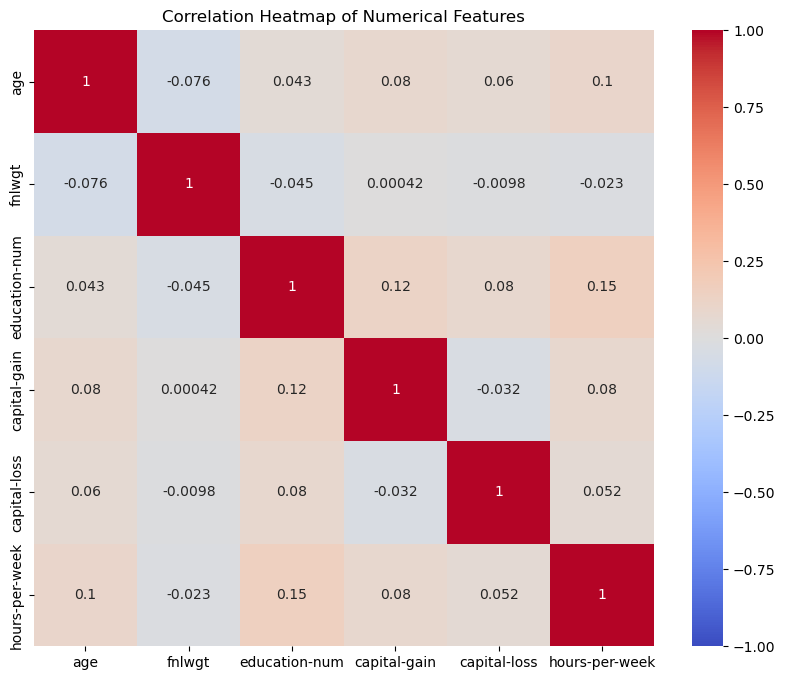

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

- Very high correlation is not present among the variables

### Train test split of the data

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42,stratify=y)

###  Applying SMOTE for class balancing

In [17]:

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print("\nClass distribution after SMOTE:")
print(y_train_smote.value_counts(normalize=True))


Class distribution after SMOTE:
income
0    0.5
1    0.5
Name: proportion, dtype: float64


### Model building Function


Logistic Regression:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      4527
           1       0.52      0.74      0.61      1501

    accuracy                           0.77      6028
   macro avg       0.71      0.76      0.72      6028
weighted avg       0.81      0.77      0.78      6028



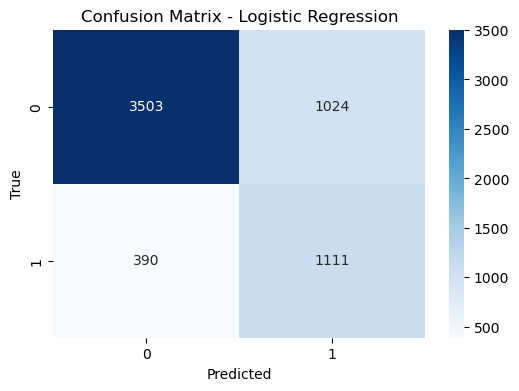

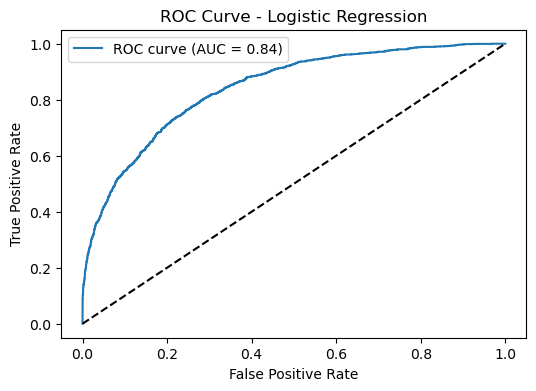


Decision Tree:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      4527
           1       0.57      0.63      0.60      1501

    accuracy                           0.79      6028
   macro avg       0.72      0.74      0.73      6028
weighted avg       0.80      0.79      0.79      6028



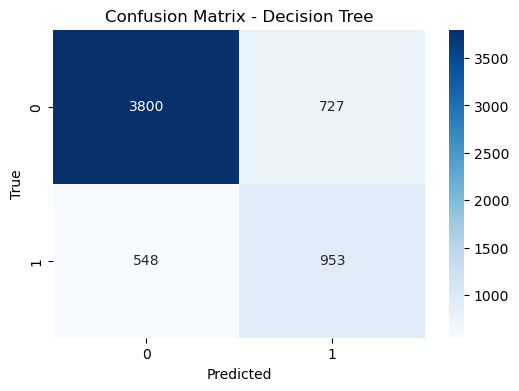

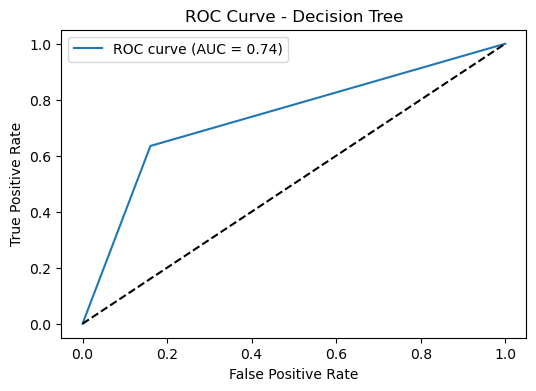


Random Forest:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4527
           1       0.66      0.72      0.69      1501

    accuracy                           0.84      6028
   macro avg       0.78      0.80      0.79      6028
weighted avg       0.84      0.84      0.84      6028



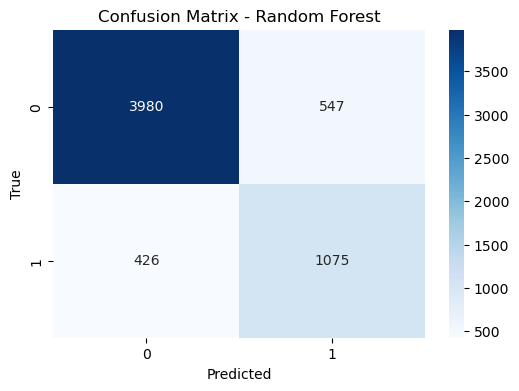

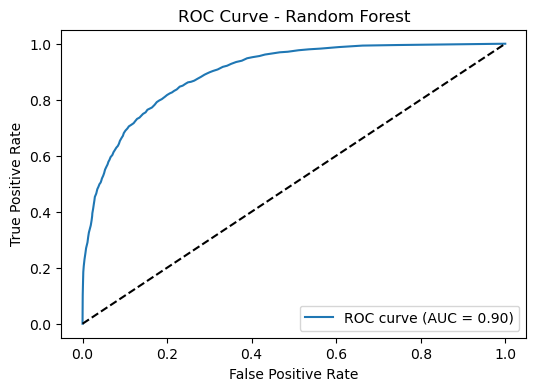


AdaBoost:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87      4527
           1       0.60      0.79      0.69      1501

    accuracy                           0.82      6028
   macro avg       0.76      0.81      0.78      6028
weighted avg       0.84      0.82      0.83      6028



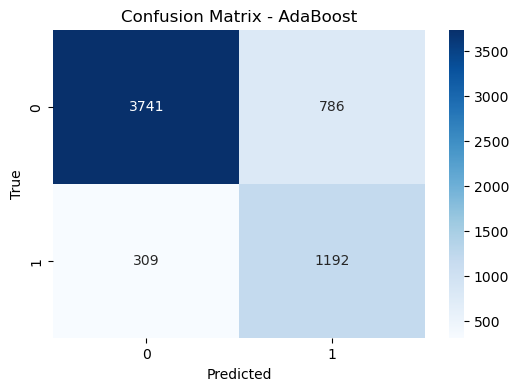

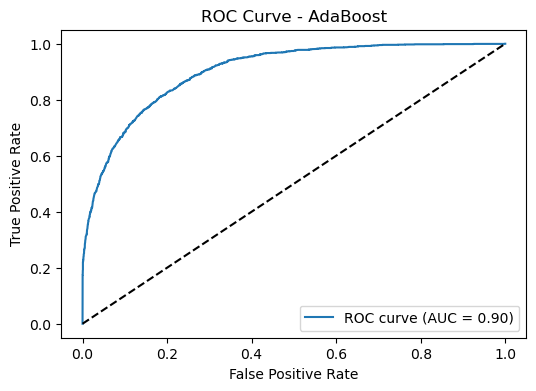


Gradient Boosting:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88      4527
           1       0.61      0.80      0.70      1501

    accuracy                           0.82      6028
   macro avg       0.77      0.82      0.79      6028
weighted avg       0.85      0.82      0.83      6028



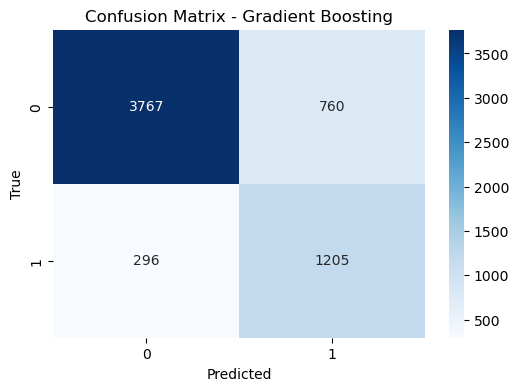

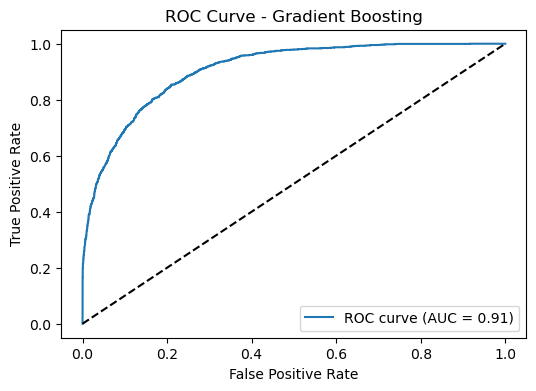


Bagging:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      4527
           1       0.66      0.65      0.66      1501

    accuracy                           0.83      6028
   macro avg       0.77      0.77      0.77      6028
weighted avg       0.83      0.83      0.83      6028



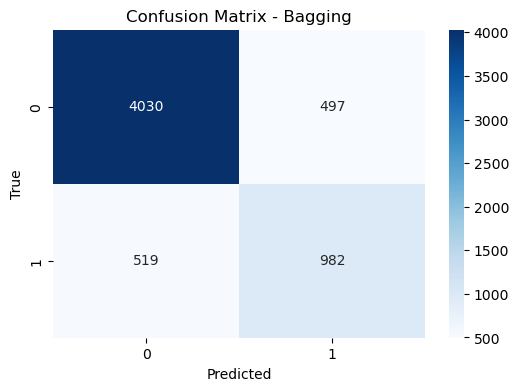

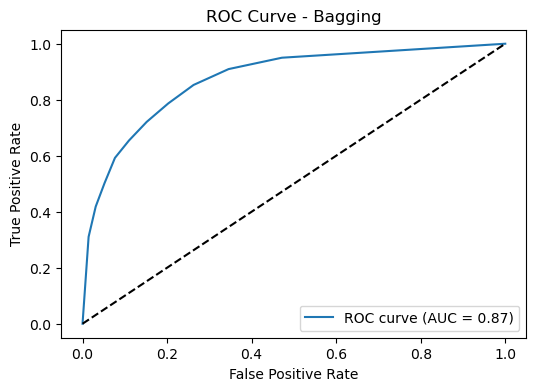


SVC:
               precision    recall  f1-score   support

           0       0.91      0.76      0.83      4527
           1       0.51      0.76      0.61      1501

    accuracy                           0.76      6028
   macro avg       0.71      0.76      0.72      6028
weighted avg       0.81      0.76      0.77      6028



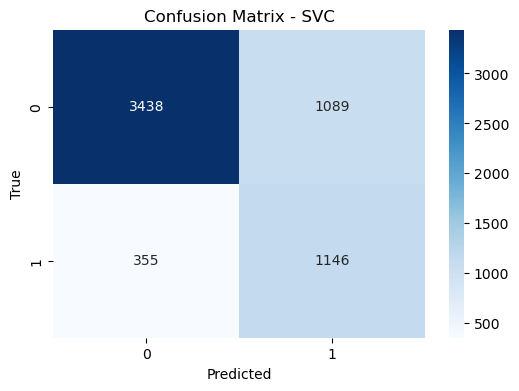

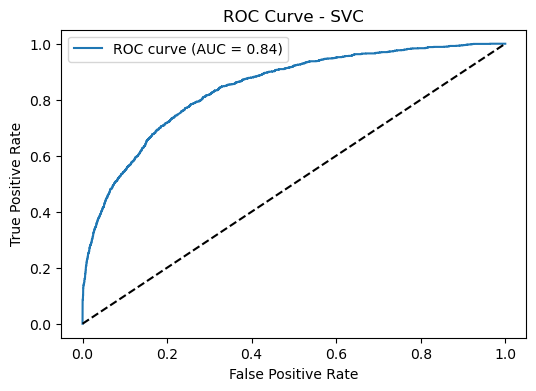

In [18]:
def train_and_evaluate_models(x_train, y_train, x_test, y_test):
    # Defining the classification models
    classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42, kernel='linear')
}
    # Storing the results results
    results = {}
    
    for name, clf in classifiers.items():
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        results[name] = classification_report(y_test, y_pred, output_dict=True)
        print(f"\n{name}:\n", classification_report(y_test, y_pred))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        
        # ROC Curve
        y_prob = clf.predict_proba(x_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='best')
        plt.show()
        
    return results

# Calling the function
results = train_and_evaluate_models(x_train_smote, y_train_smote, x_test, y_test)

### Model Comparison

In [19]:
top_models = sorted(results.items(), key=lambda x: x[1]['1']['f1-score'], reverse=True)[:3]  # Top 3 models
print("\nTop Models for Tuning:", [name for name, _ in top_models])


Top Models for Tuning: ['Gradient Boosting', 'Random Forest', 'AdaBoost']


### Hyper parameter Tuning for the Top performing Models

In [20]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

param_grids = {
    'Random Forest': 
        {
        'n_estimators': [100, 200,400,500],    
        'max_depth': [10, 20, None],          
        'min_samples_split': [2, 5],          
        'min_samples_leaf': [1, 2]            
        },
    'Gradient Boosting': 
        {
        'n_estimators': [100, 200,300,500,700], 
        'learning_rate': [0.01, 0.05, 0.1, 0.5],
        'max_depth': [3, 5]                  
        },
    'AdaBoost': 
        {
        'n_estimators': [50, 100, 200],       
        'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]     
        }
}

tuned_models = {}
for name in ['Random Forest', 'Gradient Boosting', 'AdaBoost']:
    print(f"\nTuning {name}...")
    grid = GridSearchCV(
        classifiers[name], 
        param_grids[name], 
        cv=5, 
        scoring='f1',  
        n_jobs=-1
    )
    grid.fit(x_train_smote, y_train_smote)
    tuned_models[name] = grid.best_estimator_
    
    # Report best parameters and performance
    print(f"Tuned {name} Best Params: {grid.best_params_}")
    y_pred_tuned = grid.predict(x_test)
    print(f"Tuned {name} Performance:\n", classification_report(y_test, y_pred_tuned))
# Select and save the best model
best_model_name = max(tuned_models, key=lambda x: classification_report(y_test, tuned_models[x].predict(x_test), output_dict=True)['1']['f1-score'])
best_model = tuned_models[best_model_name]
y_pred_final = best_model.predict(x_test)
print(f"\nBest Model ({best_model_name}) Final Performance:\n", classification_report(y_test, y_pred_final))


Tuning Random Forest...
Tuned Random Forest Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Tuned Random Forest Performance:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4527
           1       0.67      0.72      0.69      1501

    accuracy                           0.84      6028
   macro avg       0.79      0.80      0.79      6028
weighted avg       0.84      0.84      0.84      6028


Tuning Gradient Boosting...
Tuned Gradient Boosting Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Tuned Gradient Boosting Performance:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      4527
           1       0.71      0.73      0.72      1501

    accuracy                           0.86      6028
   macro avg       0.81      0.81      0.81      6028
weighted avg       0.86      0.86      0.86      6028


T

### Plotting decision boundaries

#### Using PCA to reduce data to 2D

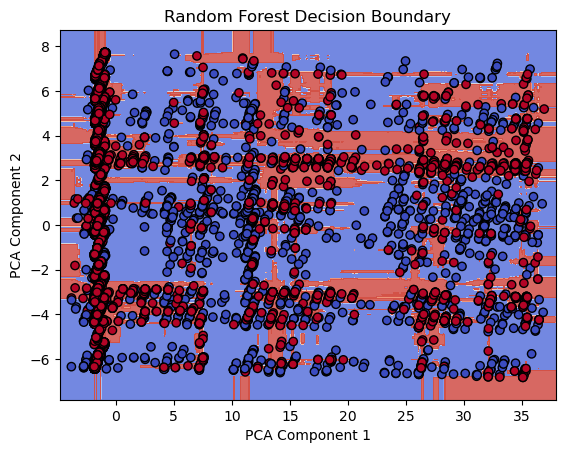

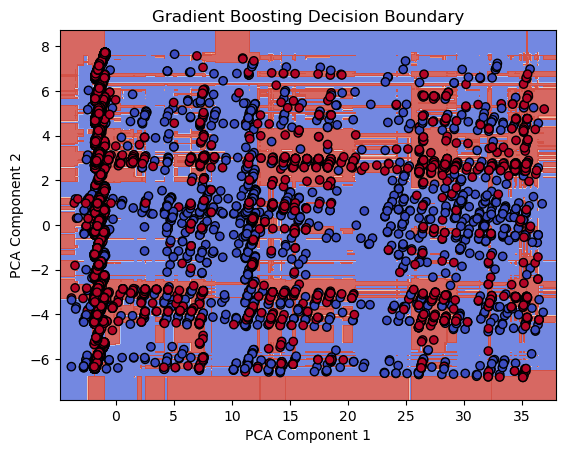

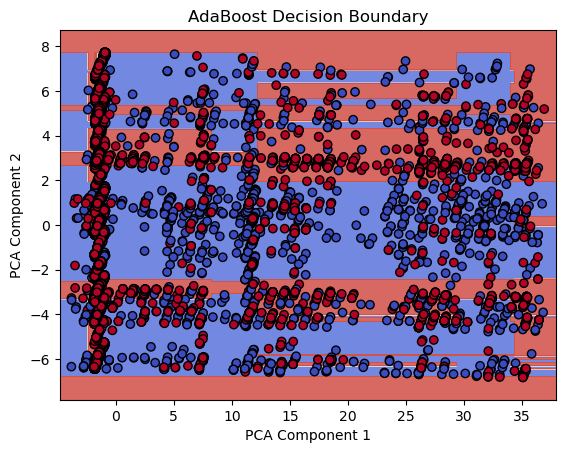

In [21]:
pca = PCA(n_components=2)
x_train_2d = pca.fit_transform(x_train_smote)
x_test_2d = pca.transform(x_test)

def plot_decision_boundary(clf, X, y, title):
    clf.fit(X, y)
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Plot decision boundaries for tuned models
for name, model in tuned_models.items():
    plot_decision_boundary(model, x_train_2d, y_train_smote, f'{name} Decision Boundary')

## Conclusion:

- Model Exploration: Seven classifiers were initially evaluated— **Logistic Regression** (accuracy: 0.77), **Decision Tree** (0.79), **Random Forest** (0.84), **AdaBoost** (0.82), **Gradient Boosting** (0.82), **Bagging** (0.83), and **SVC** (0.76) with Random Forest and Gradient Boosting showing the highest F1-scores for the minority class (>50K).
- Hyperparameter Tuning: The top three models (Gradient Boosting, Random Forest, AdaBoost) were tuned using GridSearchCV with F1-score as the metric:
- Tuned Random Forest: Achieved an accuracy of 0.84 and F1-score of 0.69 for >50K (params: n_estimators=500, max_depth=None, min_samples_split=2, min_samples_leaf=1).
- Tuned Gradient Boosting: Outperformed others with an accuracy of 0.86 and F1-score of 0.72 for >50K (params: n_estimators=300, learning_rate=0.1, max_depth=5).
- Tuned AdaBoost: Recorded an accuracy of 0.83 and F1-score of 0.70 for >50K (params: n_estimators=200, learning_rate=1.0).
- Best Model: Gradient Boosting was selected as the best model, offering the highest F1-score (0.72) and accuracy (0.86), with strong precision (0.71) and recall (0.73) for identifying high-income individuals (>50K).

The tuned Gradient Boosting model effectively predicts whether an individual’s income exceeds $50K/year, making it suitable for applications like socioeconomic analysis or targeted resource allocation.